In [64]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [65]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
df = pd.read_csv('../combined_profile.csv')
# df.info()
df['status']= df['status'].apply(lambda x:x.strip())
df['gender']= df['gender'].apply(lambda x:x.strip())
df

,username,age,occupation,status,gender,filtered sentence,y
0,sandralee,19,student,single,female,Im really chill person looking someone chill I...,0
1,dayana16,19,estudiante,single,female,white Bisexual Other nonsmoker occasional drin...,0
2,Denn_,19,Estudiante,single,female,hispanic Bisexual Atheist nonsmoker never Fun ...,0
3,Gabrielita,19,Estudiante,single,female,hispanic Bisexual Christian nonsmoker never Se...,0
4,Luisa5401,19,Estudiante,single,female,hispanic Straight Other nonsmoker never Fun Fr...,0
...,...,...,...,...,...,...,...
7929,devortedman900,69,Engineer,widow,male,I told I great sense humour judge I would desc...,1
7930,antonie07,71,self employed,divorced,male,I determined cheerful happy whatever situation...,1
7931,wesleyclary,72,military,widow,male,Yea loving caring man honest fault always loya...,1
7932,charitywork,73,self-employed,widow,female,good investor good heart help needy poor,1


In [67]:
df.dropna(inplace=True)

In [68]:
df['occupation'].unique().tolist()

['student',
 'estudiante',
 'Estudiante',
 'Student',
 'Estudio',
 'Gerente',
 'Estudiante de Derecho',
 'Unemployed',
 'Educator',
 'ESTUDIO',
 'Camarera',
 'Manicurista',
 'Universitaria',
 'Niñera',
 'Estudios',
 'Independiente',
 'Estudiar',
 'Manager',
 'secretaria',
 'Plomero',
 'Contador',
 'Salesman',
 'Emprendedora',
 'Estudiando',
 'Trabajo',
 'Enfermera',
 'Clerk',
 'Waitress',
 'Estudiante universitario',
 'Construction',
 'Baker',
 'Self Employed',
 'Ama de casa',
 'Comerciante',
 'maestra',
 'Ingeniero',
 'Administradora de empresas',
 'Teacher',
 'Tecnico',
 'Secretaria',
 'Oficina',
 'Barbero',
 'Estudio y trabajo',
 'Esteticista',
 'Journalist',
 'Nurse',
 'Customer service',
 'Landscaping',
 'Maestra',
 'Atención al cliente',
 'Pintor',
 'Chef',
 'Barista',
 'Futbolista',
 'Laboro',
 'Estilista',
 'Construccion',
 'Musico',
 'ESTUDIANTE',
 'Electricista',
 'Lawyer',
 'Universidad',
 'Periodistas',
 'Nursing',
 'military',
 'Digitador',
 'cajera',
 'Engineer',
 'Conduc

In [69]:
df['occupation'].value_counts()

 military              346
 self employed         271
 student               262
 engineer              209
Estudiante             164
                      ... 
MAESTRA                  2
Engineer Electronic      2
Banca                    2
 United State Army       2
 Sales/Marketing         1
Name: occupation, Length: 947, dtype: int64

In [70]:
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)

In [71]:
# binning for age column
bins=[18,34,48,60,95]
label=['18-34','35-48','49-60','61-85']
df['age_group']= pd.qcut(df['age'],4)

In [72]:
# label encoding for age column
df['age_group_encoded'] = labelencoder.fit_transform(df['age_group'])

In [73]:
df['age_group_encoded'].value_counts()

0    2130
2    1963
1    1941
3    1900
Name: age_group_encoded, dtype: int64

In [74]:
# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded']]
X.sample(10)


,status_encoded,gender_encoded,age_group_encoded
1839,3,1,1
3982,4,1,2
7035,6,1,2
3243,0,1,2
2752,3,1,1
2483,4,1,1
1690,4,0,1
7133,0,1,2
6447,4,1,1
2982,0,1,2


In [75]:
df[df['status']=='married']

,username,age,occupation,status,gender,filtered sentence,y,status_encoded,gender_encoded,age_group,age_group_encoded
58,Jon2511,22,Trabajo,married,male,native american Bisexual Other nonsmoker never...,0,2,1,"(17.999, 33.0]",0
624,Gabby29,29,Construccion,married,male,hispanic Straight Other nonsmoker occasional d...,0,2,1,"(17.999, 33.0]",0
746,Dominate,30,Mechanic,married,male,mixed Straight Christian nonsmoker never Fun,0,2,1,"(17.999, 33.0]",0
757,Enriiqer,30,Independiente,married,male,hispanic Straight Christian chain smoker socia...,0,2,1,"(17.999, 33.0]",0
828,Ritore85,30,Comercial,married,male,hispanic Straight Christian nonsmoker never Fu...,0,2,1,"(17.999, 33.0]",0
...,...,...,...,...,...,...,...,...,...,...,...
4905,coolalone,62,Business,married,male,I trusted honest loving caring earth love trav...,0,2,1,"(51.0, 85.0]",3
4909,Macadoo,62,retired,married,male,Love outdoor animals playing golf,0,2,1,"(51.0, 85.0]",3
5014,Anjie,64,Paralegal,married,female,white Straight Other nonsmoker occasional drin...,0,2,0,"(51.0, 85.0]",3
5152,John29903,68,Sales,married,male,Youll laugh sense humor contagious Friends des...,0,2,1,"(51.0, 85.0]",3


In [76]:
df.iloc[345]['status']

'single'

<h3>Before Sampling<h3>

In [77]:
# target
y = df["y"]

In [78]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=99)

In [79]:
# initialise Decision Tree
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6262755102040817, 0.9375, 'X[0] <= 4.5\nentropy = 0.923\nsamples = 3173\nvalue = [2101, 1072]'),
 Text(0.3647959183673469, 0.8125, 'X[1] <= 0.5\nentropy = 0.84\nsamples = 2776\nvalue = [2030, 746]'),
 Text(0.1836734693877551, 0.6875, 'X[2] <= 1.5\nentropy = 0.978\nsamples = 1022\nvalue = [601, 421]'),
 Text(0.10204081632653061, 0.5625, 'X[2] <= 0.5\nentropy = 0.997\nsamples = 768\nvalue = [360, 408]'),
 Text(0.061224489795918366, 0.4375, 'X[0] <= 3.5\nentropy = 0.953\nsamples = 499\nvalue = [186, 313]'),
 Text(0.04081632653061224, 0.3125, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 27\nvalue = [18, 9]'),
 Text(0.02040816326530612, 0.1875, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.061224489795918366, 0.1875, 'X[0] <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [13, 2]'),
 Text(0.04081632653061224, 0.0625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.08163265306122448, 0.0625, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.08163265306122448, 0.312

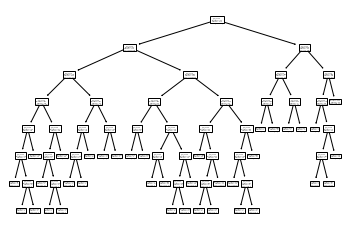

In [80]:
tree.plot_tree(clf1)

In [81]:
# get predictions and compare results
predictions1 = clf1.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions1})
results_df.sample(10)

,Actual,Predicted
2698,0,0
2655,0,0
1292,0,0
2671,0,0
180,0,0
440,0,0
6435,1,0
2100,0,0
6193,1,0
658,0,0


In [82]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions1)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("before sampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

before sampling
Accuracy: 0.7960512497374501
Precision: 0.7460063897763578
recall: 0.5885318210459988
f1_score: 0.65797816132441


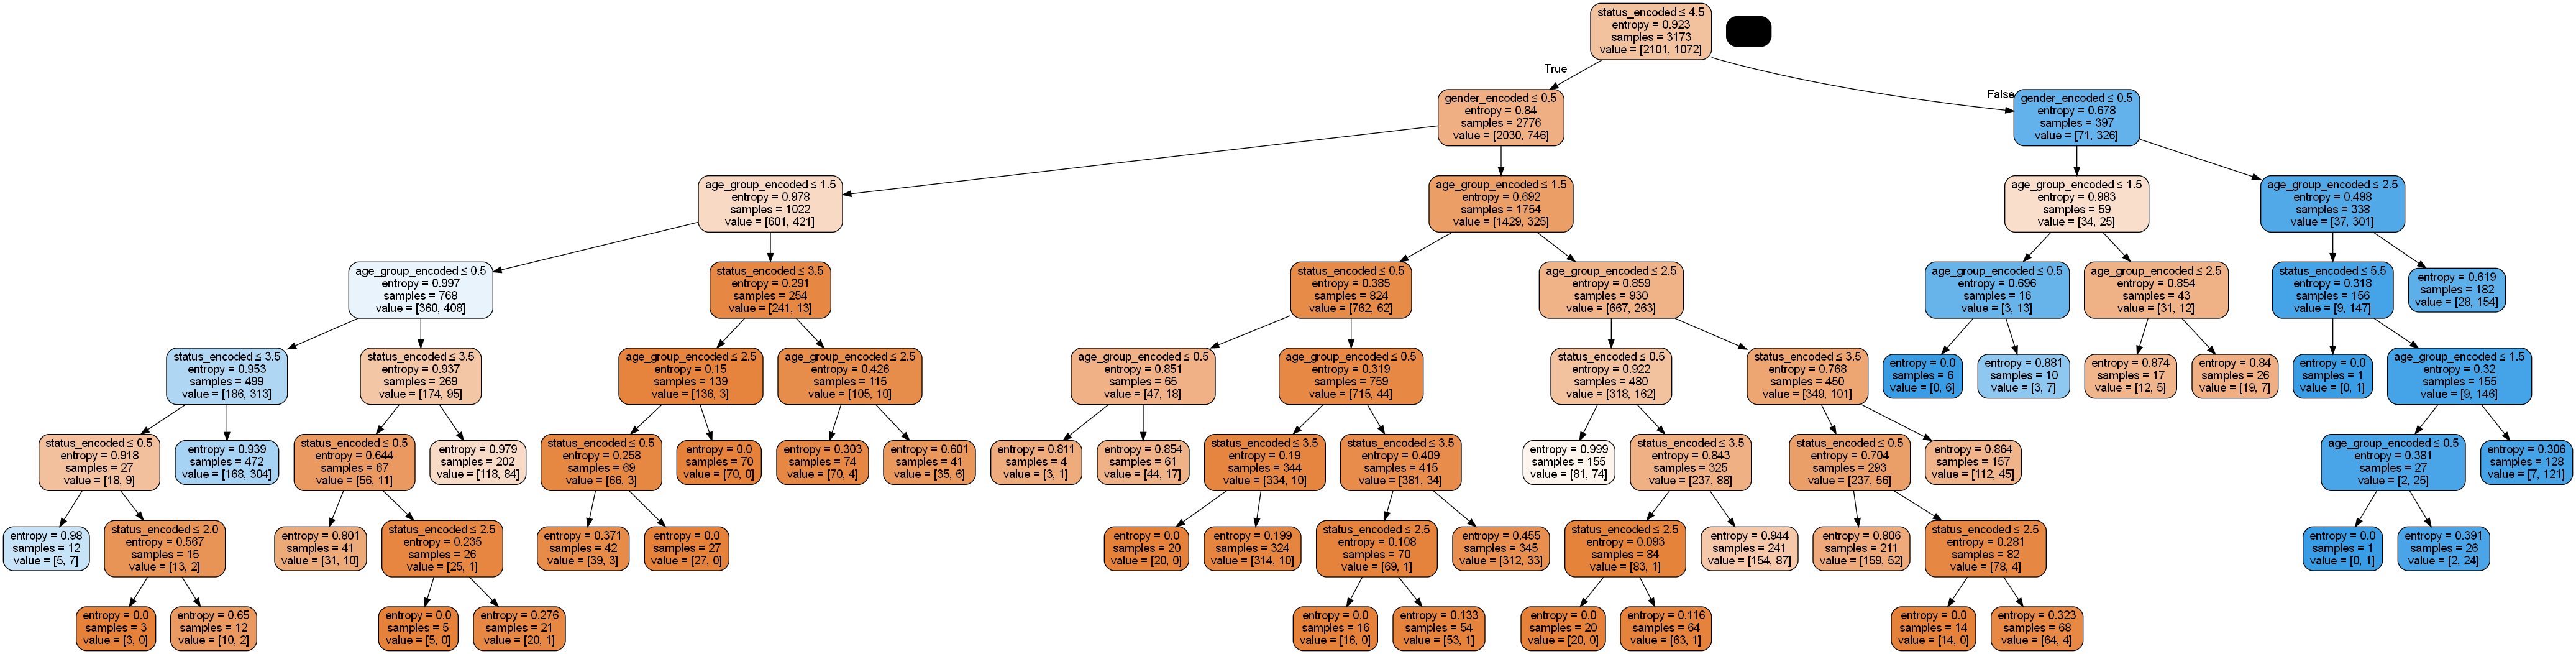

In [83]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded']

dot_data = StringIO()
export_graphviz(clf1, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h3> Random Under Sampling<h3>

In [84]:
# random under sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [85]:
# initialise Decision Tree
clf2 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf2.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6142676767676768, 0.9375, 'X[0] <= 4.5\nentropy = 1.0\nsamples = 2144\nvalue = [1072, 1072]'),
 Text(0.35984848484848486, 0.8125, 'X[1] <= 0.5\nentropy = 0.981\nsamples = 1782\nvalue = [1036, 746]'),
 Text(0.18181818181818182, 0.6875, 'X[2] <= 1.5\nentropy = 0.975\nsamples = 711\nvalue = [290, 421]'),
 Text(0.10101010101010101, 0.5625, 'X[2] <= 0.5\nentropy = 0.884\nsamples = 585\nvalue = [177, 408]'),
 Text(0.06060606060606061, 0.4375, 'X[0] <= 3.5\nentropy = 0.752\nsamples = 399\nvalue = [86, 313]'),
 Text(0.04040404040404041, 0.3125, 'X[0] <= 0.5\nentropy = 0.998\nsamples = 19\nvalue = [10, 9]'),
 Text(0.020202020202020204, 0.1875, 'entropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.06060606060606061, 0.1875, 'X[0] <= 2.0\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.04040404040404041, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08080808080808081, 0.0625, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.08080808080808081, 0.3125, '

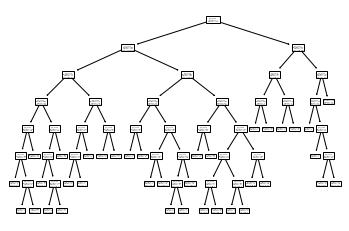

In [86]:
tree.plot_tree(clf2)

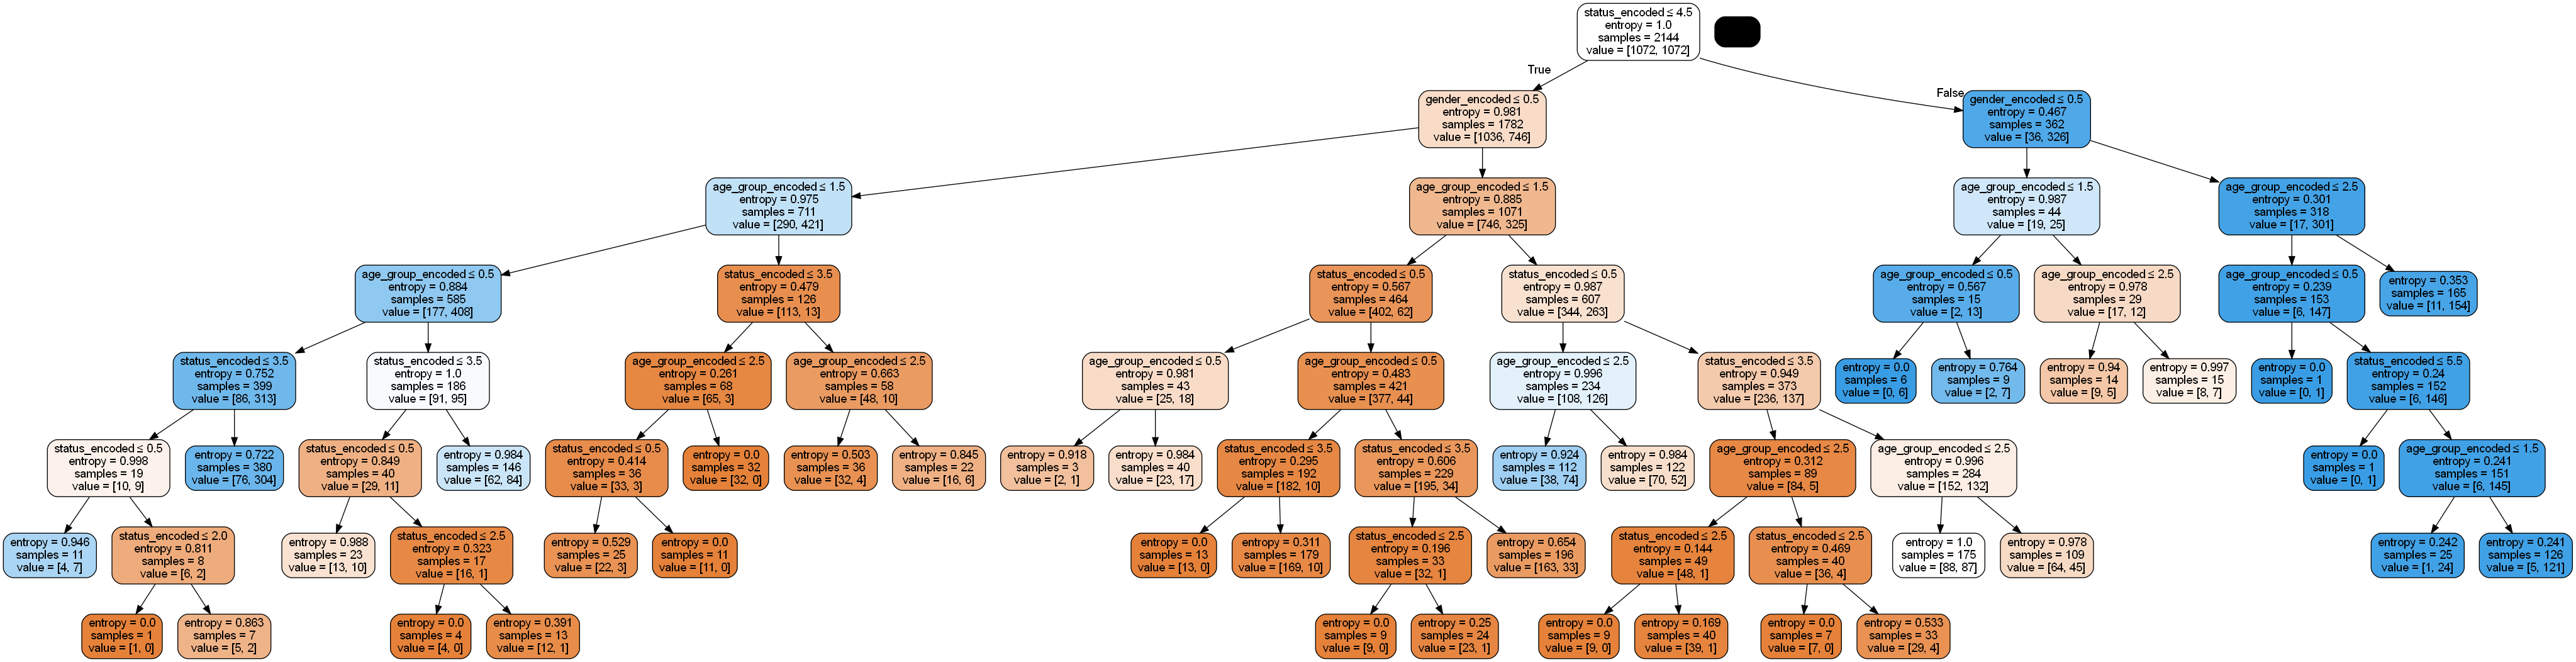

In [87]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded']

dot_data = StringIO()
export_graphviz(clf2, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [88]:
# get predictions and compare results
predictions2 = clf2.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions2})
results_df.sample(10)

,Actual,Predicted
1174,0,0
1980,0,0
1471,0,0
6731,1,0
2463,0,0
1532,0,0
4851,0,0
808,0,1
7290,1,0
7504,1,0


In [89]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions2)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random undersampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random undersampling
Accuracy: 0.7739970594412938
Precision: 0.6431372549019608
recall: 0.7233774417139256
f1_score: 0.6809015421115066


<h3> Random Over Sampling<h3>

In [90]:
# random over sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [91]:
# initialise Decision Tree
clf3 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf3.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6262755102040817, 0.9375, 'X[0] <= 4.5\nentropy = 1.0\nsamples = 4202\nvalue = [2101, 2101]'),
 Text(0.3647959183673469, 0.8125, 'X[1] <= 0.5\nentropy = 0.982\nsamples = 3504\nvalue = [2030, 1474]'),
 Text(0.1836734693877551, 0.6875, 'X[2] <= 1.5\nentropy = 0.98\nsamples = 1441\nvalue = [601, 840]'),
 Text(0.10204081632653061, 0.5625, 'X[2] <= 0.5\nentropy = 0.887\nsamples = 1180\nvalue = [360, 820]'),
 Text(0.061224489795918366, 0.4375, 'X[0] <= 3.5\nentropy = 0.772\nsamples = 820\nvalue = [186, 634]'),
 Text(0.04081632653061224, 0.3125, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 33\nvalue = [18, 15]'),
 Text(0.02040816326530612, 0.1875, 'entropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(0.061224489795918366, 0.1875, 'X[0] <= 2.0\nentropy = 0.852\nsamples = 18\nvalue = [13, 5]'),
 Text(0.04081632653061224, 0.0625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.08163265306122448, 0.0625, 'entropy = 0.918\nsamples = 15\nvalue = [10, 5]'),
 Text(0.08163265306122448, 0

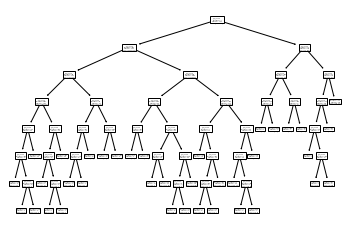

In [92]:
tree.plot_tree(clf3)

In [93]:
# get predictions and compare results
predictions3 = clf3.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions3})
results_df.sample(10)

,Actual,Predicted
3593,0,0
7174,1,1
6722,1,1
6563,1,1
4773,0,0
137,0,0
6823,1,1
4871,0,0
7394,1,1
544,0,0


In [94]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions3)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random oversampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random oversampling
Accuracy: 0.7387103549674439
Precision: 0.5784897025171625
recall: 0.796471329552615
f1_score: 0.670201484623542


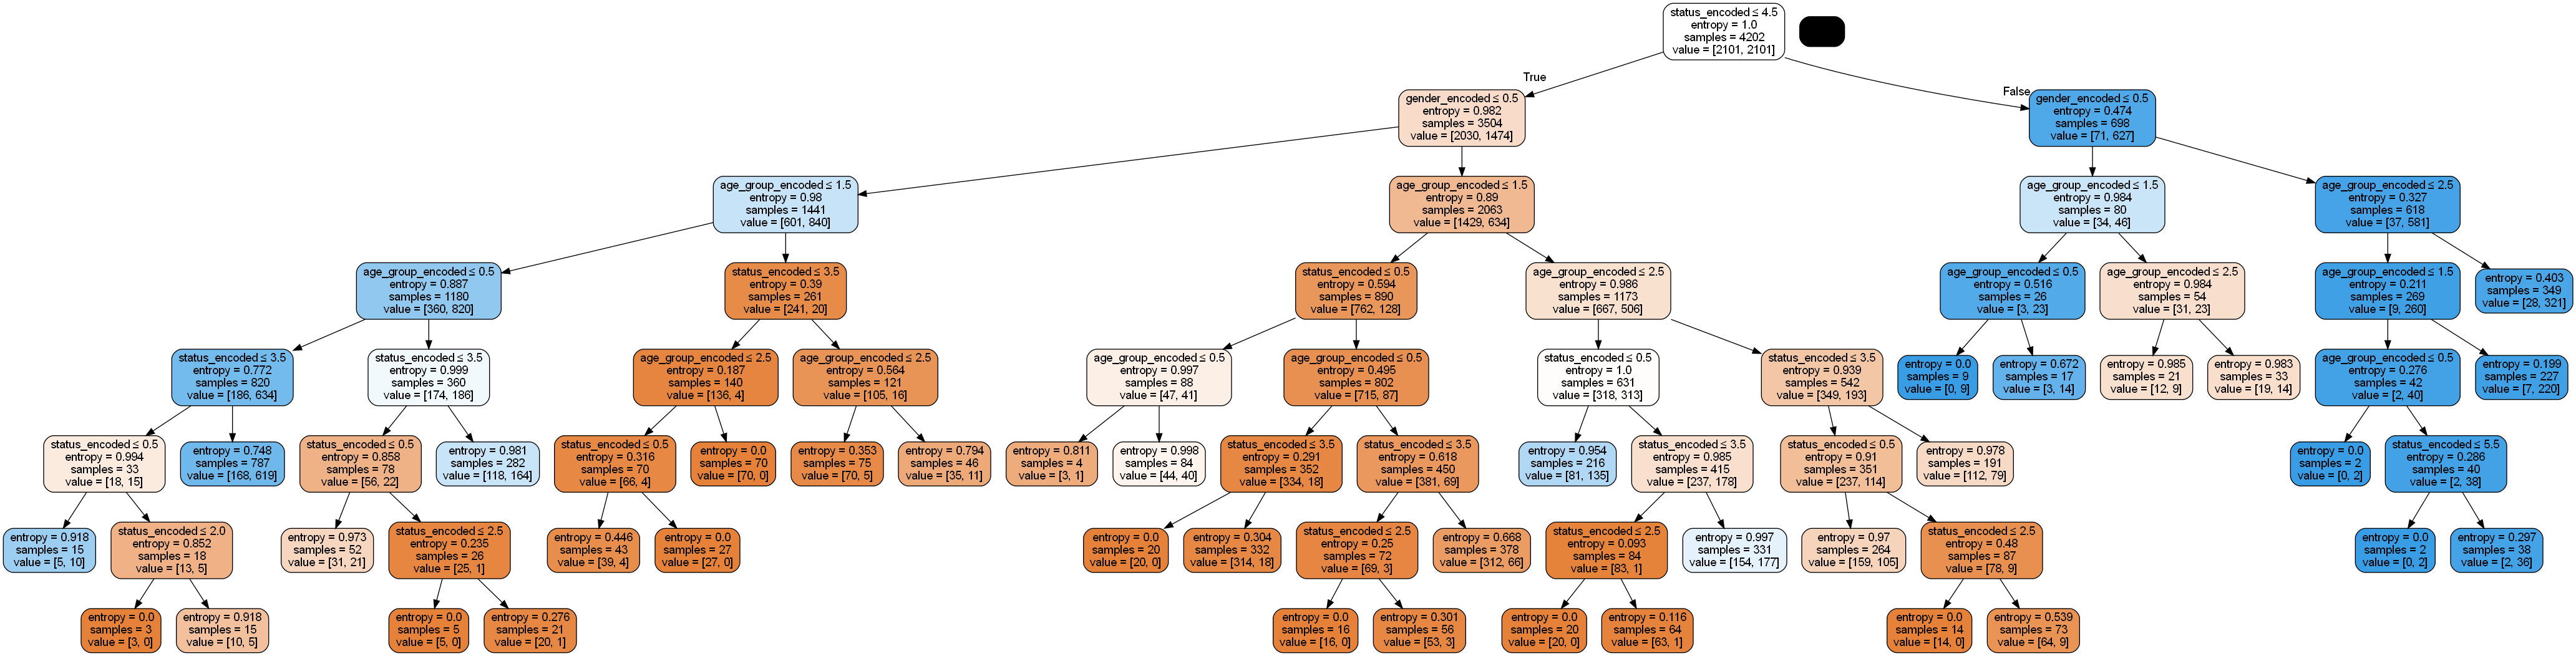

In [96]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded']

dot_data = StringIO()
export_graphviz(clf3, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h3>Test on testing data<h3>

In [98]:
data = [[58,'married','male']]
testdf = pd.DataFrame(data, columns=['age', 'status','gender'])
testdf['age_group_encoded'] = 3
testdf['status_encoded'] = 2
testdf['gender_encoded'] = 1
test = testdf[['status_encoded','gender_encoded','age_group_encoded']]
pred = clf1.predict(test)
results = pd.DataFrame({'Pred': pred})
results

,Pred
0,0
